In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images, test_images = train_images/255.0, test_images/255.0

In [4]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))
#Split the dataset into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split( train_images, train_labels, test_size=0.1, random_state=42)
# Data augmentation for training images
datagen = ImageDataGenerator(rotation_range=10, zoom_range=0.1, width_shift_range=0.1, height_shift_range=0.1)
datagen.fit(train_images)
from keras import models, layers
# Create a CNN model with hyperparameter tuning and regularization
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#Train the model with data augmentation
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64), epochs=20, validation_data=(val_images, val_labels))

Epoch 1/20
844/844 [==============================] - 132s 145ms/step - loss: 0.3914 - accuracy: 0.8736 - val_loss: 0.0701 - val_accuracy: 0.9788
Epoch 2/20
844/844 [==============================] - 115s 136ms/step - loss: 0.1293 - accuracy: 0.9595 - val_loss: 0.0531 - val_accuracy: 0.9847
Epoch 3/20
844/844 [==============================] - 118s 139ms/step - loss: 0.0961 - accuracy: 0.9710 - val_loss: 0.0434 - val_accuracy: 0.9870
Epoch 4/20
844/844 [==============================] - 125s 148ms/step - loss: 0.0830 - accuracy: 0.9747 - val_loss: 0.0373 - val_accuracy: 0.9885
Epoch 5/20
844/844 [==============================] - 129s 152ms/step - loss: 0.0715 - accuracy: 0.9786 - val_loss: 0.0281 - val_accuracy: 0.9918
Epoch 6/20
844/844 [==============================] - 98s 116ms/step - loss: 0.0647 - accuracy: 0.9796 - val_loss: 0.0323 - val_accuracy: 0.9903
Epoch 7/20
844/844 [==============================] - 77s 91ms/step - loss: 0.0564 - accuracy: 0.9824 - val_loss: 0.0490 - va

In [5]:
#Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")

313/313 [==============================] - 3s 10ms/step - loss: 0.0188 - accuracy: 0.9951
Test Accuracy: 0.9951000213623047


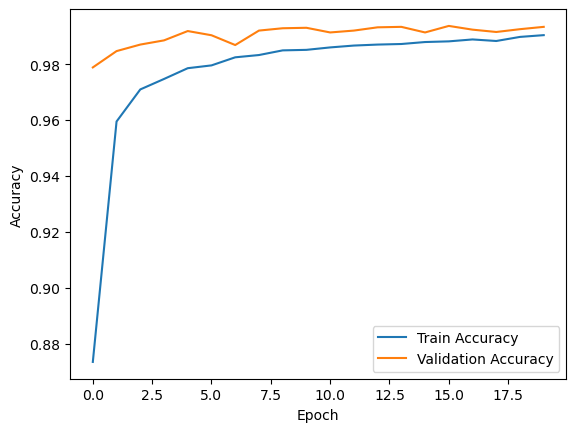

In [6]:
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()